In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns

mush = pd.read_csv('/home/xsrnak00/Documents/work/linux-erasmus/linux-ai/datasets/datasets/mushrooms.csv')

mush.groupby('class')['class'].count()

class
e    4208
p    3916
Name: class, dtype: int64

# Bruises

In [165]:
#change bruises from chars to 1 and 0
#bruises off = 0; bruises on = 1
mush['bruises'] = np.where(mush['bruises'] == 'f', 0,
                            np.where(mush['bruises'] == 't', 1, 2))


In [166]:
#edible mushrooms tend to have bruises more
mush.groupby('class')['bruises'].mean()

class
e    0.653992
p    0.159346
Name: bruises, dtype: float64

In [167]:
mush.groupby(['class','bruises'])['bruises'].count()

class  bruises
e      0          1456
       1          2752
p      0          3292
       1           624
Name: bruises, dtype: int64

In [168]:
#let's bake some pies
aggreg =  mush.groupby(['class', 'bruises'])['bruises'].count()

In [169]:

#create data frame
df_bruises = aggreg.to_frame()
df_bruises['count'] = df_bruises['bruises']
df_bruises['class'] = df_bruises.index.get_level_values(0)
df_bruises['bruises'] = df_bruises.index.get_level_values(1)
df_bruises = df_bruises.reset_index(drop=True)
df_bruises

,bruises,count,class
0,0,1456,e
1,1,2752,e
2,0,3292,p
3,1,624,p


In [170]:
df_bruises_e = df_bruises[df_bruises['class'] == 'e'].reset_index(drop=True)
df_bruises_p = df_bruises[df_bruises['class'] == 'p'].reset_index(drop=True)
df_bruises_e['perc'] = df_bruises_e['count'] / df_bruises_e['count'].sum()
df_bruises_p['perc'] = df_bruises_p['count'] / df_bruises_p['count'].sum()

Text(0.5, 1.0, 'Distribution of bruises between edible mushrooms(0 no bruises, 1 bruises)')

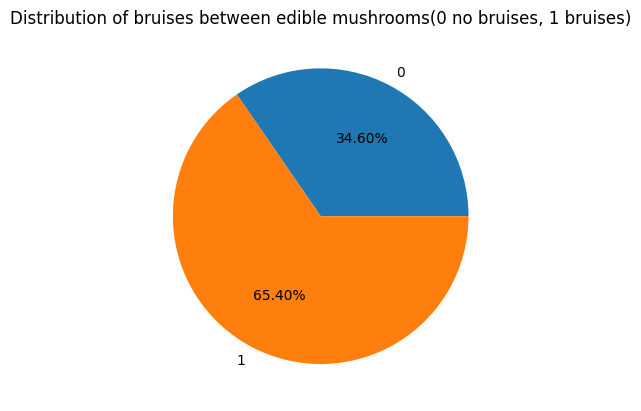

In [171]:
plt.pie(x='perc', labels='bruises', data=df_bruises_e, autopct='%.2f%%')
plt.title('Distribution of bruises between edible mushrooms(0 no bruises, 1 bruises)')

Text(0.5, 1.0, 'Distribution of bruises between poisonous mushrooms(0 no bruises, 1 bruises)')

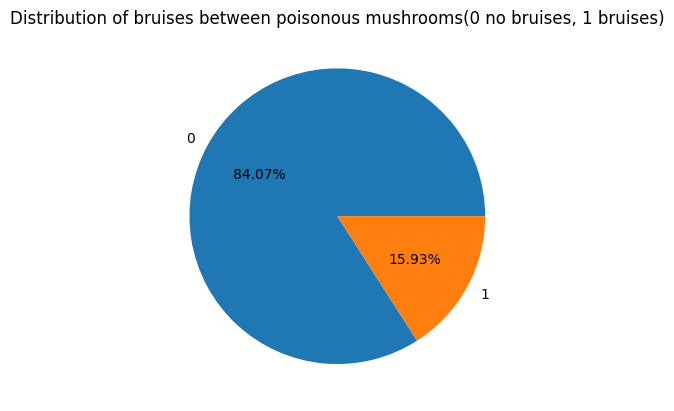

In [172]:
plt.pie(x='perc', labels='bruises', data=df_bruises_p, autopct='%.2f%%')
plt.title('Distribution of bruises between poisonous mushrooms(0 no bruises, 1 bruises)')

Conclusion: We can see that the distribution is almost completely inverted from the plot. It also means, that a mushroom with bruises is more likely going to be edible, than a mushroom without bruises.

# Cap shape

In [173]:
#change chars to nums
#Bell(0), Conical(1), conveX(2), Flat(3), Knobbed(k), Sunken(s)
mush['cap-shape'] = np.where(mush['cap-shape'] == 'b', 0,
                            np.where(mush['cap-shape'] == 'c', 1,
                                     np.where(mush['cap-shape'] == 'x', 2,
                                            np.where(mush['cap-shape'] == 'f', 3,
                                                    np.where(mush['cap-shape'] == 'k', 4,
                                                            np.where(mush['cap-shape'] == 's', 5, 6)))) ))



In [174]:
agg = mush.groupby(['class', 'cap-shape'])['cap-shape'].count()
agg 

class  cap-shape
e      0             404
       2            1948
       3            1596
       4             228
       5              32
p      0              48
       1               4
       2            1708
       3            1556
       4             600
Name: cap-shape, dtype: int64

We can see, that if a mushroom has a conical cap shape(1), it is definitely poisonous. If a mushroom has sunken(5) cap shape, it is definitely edible. Both edible and poisonous mushrooms tend to have convex(2) and flat(3) cap shape.

In [175]:
#dataframe
df_cap_shape = agg.to_frame()
df_cap_shape['count'] = df_cap_shape['cap-shape']
df_cap_shape['class'] = df_cap_shape.index.get_level_values(0)
df_cap_shape['cap-shape'] = df_cap_shape.index.get_level_values(1)
df_cap_shape = df_cap_shape.reset_index(drop=True)
df_cap_shape

,cap-shape,count,class
0,0,404,e
1,2,1948,e
2,3,1596,e
3,4,228,e
4,5,32,e
5,0,48,p
6,1,4,p
7,2,1708,p
8,3,1556,p
9,4,600,p


In [176]:
df_cap_shape_e = df_cap_shape[df_cap_shape['class'] == 'e'].reset_index(drop=True)
df_cap_shape_p = df_cap_shape[df_cap_shape['class'] == 'p'].reset_index(drop=True)
df_cap_shape_e['perc'] = df_cap_shape_e['count'] / df_cap_shape_e['count'].sum()
df_cap_shape_p['perc'] = df_cap_shape_p['count'] / df_cap_shape_p['count'].sum()

Text(0.5, 1.0, 'Distribution of cap shapes between edible mushrooms')

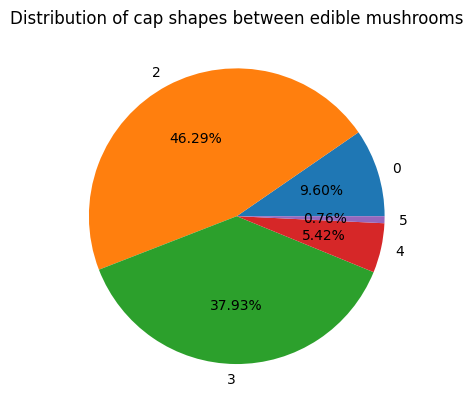

In [177]:
plt.pie(x='perc', labels='cap-shape', data=df_cap_shape_e, autopct='%.2f%%')
plt.title('Distribution of cap shapes between edible mushrooms')

Text(0.5, 1.0, 'Distribution of cap shapes between poisonous mushrooms')

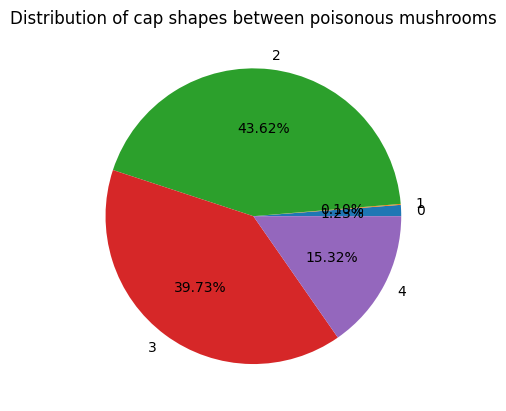

In [178]:
plt.pie(x='perc', labels='cap-shape', data=df_cap_shape_p, autopct='%.2f%%')
plt.title('Distribution of cap shapes between poisonous mushrooms')

We can see that distrubution between convex(2) and flat(3) is similar in both edible and poisonous.
We can also see that edible mushrooms have more bell(0) cap shape, whereas poisonous mush have more of a knobbed(4) cap shape.

# Cap surface

In [179]:
#chars to num
mush['cap-surface'] = np.where(mush['cap-surface'] == 'f', 0,
                            np.where(mush['cap-surface'] == 'g', 1,
                                     np.where(mush['cap-surface'] == 'y', 2,
                                            np.where(mush['cap-surface'] == 's', 3, 4))))
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,2,3,n,1,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,2,3,y,1,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,0,3,w,1,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,2,2,w,1,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,2,3,g,0,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,4,3,n,0,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,2,3,n,0,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,3,3,n,0,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,4,2,n,0,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [180]:
agg = mush.groupby(['class', 'cap-surface'])['cap-surface'].count()
agg

class  cap-surface
e      0              1560
       2              1504
       3              1144
p      0               760
       1                 4
       2              1740
       3              1412
Name: cap-surface, dtype: int64

Mushrooms with grooves(1) are definitely poisonous. 

In [181]:

#dataframe
df_cap_surf = agg.to_frame()
df_cap_surf['count'] = df_cap_surf['cap-surface']
df_cap_surf['class'] = df_cap_surf.index.get_level_values(0)
df_cap_surf['cap-surface'] = df_cap_surf.index.get_level_values(1)
df_cap_surf = df_cap_surf.reset_index(drop=True)
df_cap_surf

,cap-surface,count,class
0,0,1560,e
1,2,1504,e
2,3,1144,e
3,0,760,p
4,1,4,p
5,2,1740,p
6,3,1412,p


In [182]:
df_cap_surf_p = df_cap_surf[df_cap_surf['class'] == 'p'].reset_index(drop=True)
df_cap_surf_e = df_cap_surf[df_cap_surf['class'] == 'e'].reset_index(drop=True)
df_cap_surf_p['perc'] = df_cap_surf_p['count'] / df_cap_surf_p['count'].sum()
df_cap_surf_e['perc'] = df_cap_surf_e['count'] / df_cap_surf_e['count'].sum()

Text(0.5, 1.0, 'Distribution of cap surface in edible mushrooms')

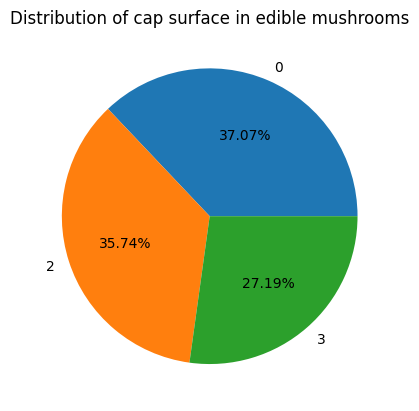

In [183]:
plt.pie(x='perc', labels='cap-surface', data=df_cap_surf_e, autopct='%.2f%%')
plt.title('Distribution of cap surface in edible mushrooms')

The distribution seems almost even, but grooves(1) is missing

Text(0.5, 1.0, 'Distribution of cap surface in poisonous mushrooms')

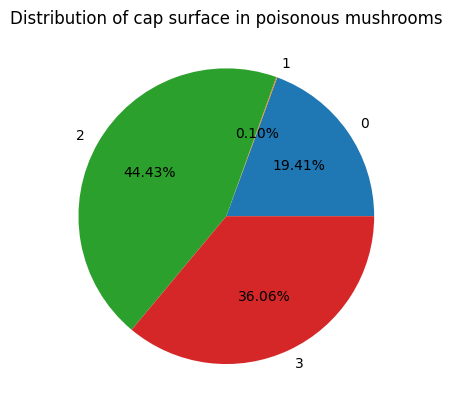

In [184]:
plt.pie(x='perc', labels='cap-surface', data=df_cap_surf_p, autopct='%.2f%%')
plt.title('Distribution of cap surface in poisonous mushrooms')

I can not tell much from this comparison. Cap surface might not be that relevant.

# Cap color

In [185]:
mush['cap-color'] = np.where(mush['cap-color'] == 'n', 0,
                            np.where(mush['cap-color'] == 'b', 1,
                                     np.where(mush['cap-color'] == 'c', 2,
                                            np.where(mush['cap-color'] == 'g', 3,
                                                    np.where(mush['cap-color'] == 'r', 4,
                                                            np.where(mush['cap-color'] == 'p', 5,
                                                                    np.where(mush['cap-color'] == 'u', 6,
                                                                            np.where(mush['cap-color'] == 'e', 7,
                                                                                    np.where(mush['cap-color'] == 'w', 8,
                                                                                            np.where(mush['cap-color'] == 'y', 9, 10)))) )))) ))


In [186]:
agg = mush.groupby(['class', 'cap-color'])['cap-color'].count()
agg

class  cap-color
e      0            1264
       1              48
       2              32
       3            1032
       4              16
       5              56
       6              16
       7             624
       8             720
       9             400
p      0            1020
       1             120
       2              12
       3             808
       5              88
       7             876
       8             320
       9             672
Name: cap-color, dtype: int64

Edible have all colors, but poisonous are missing green(4) and purple(6). Most mushrooms have brown(0) cap color.

In [187]:
#dataframe
df_cap_color = agg.to_frame()
df_cap_color['count'] = df_cap_color['cap-color']
df_cap_color['class'] = df_cap_color.index.get_level_values(0)
df_cap_color['cap-color'] = df_cap_color.index.get_level_values(1)
df_cap_color = df_cap_color.reset_index(drop=True)
df_cap_color


,cap-color,count,class
0,0,1264,e
1,1,48,e
2,2,32,e
3,3,1032,e
4,4,16,e
5,5,56,e
6,6,16,e
7,7,624,e
8,8,720,e
9,9,400,e


In [188]:
df_cap_color_p = df_cap_color[df_cap_color['class'] == 'p'].reset_index(drop=True)
df_cap_color_e = df_cap_color[df_cap_color['class'] == 'e'].reset_index(drop=True)
df_cap_color_p['perc'] = df_cap_color_p['count'] / df_cap_color_p['count'].sum()
df_cap_color_e['perc'] = df_cap_color_e['count'] / df_cap_color_e['count'].sum()

Text(0.5, 1.0, 'Distribution of cap color in edible mushrooms')

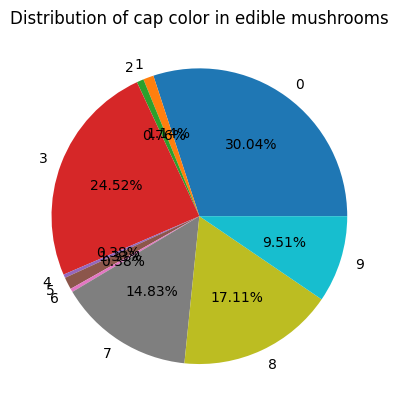

In [189]:
plt.pie(x='perc', labels='cap-color', data=df_cap_color_e, autopct='%.2f%%')
plt.title('Distribution of cap color in edible mushrooms')

Text(0.5, 1.0, 'Distribution of cap color in poisonous mushrooms')

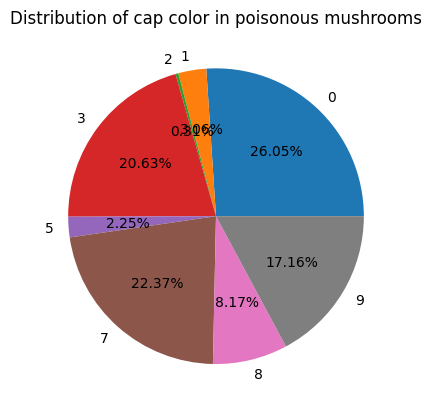

In [192]:
plt.pie(x='perc', labels='cap-color', data=df_cap_color_p, autopct='%.2f%%')
plt.title('Distribution of cap color in poisonous mushrooms')

# Odor

In [ ]:
mush['odor'] = np.where(mush['odor'] == 'a', 0,
                            np.where(mush['odor'] == 'l', 1,
                                     np.where(mush['odor'] == 'c', 2,
                                            np.where(mush['odor'] == 'y', 3,
                                                    np.where(mush['odor'] == 'f', 4,
                                                            np.where(mush['odor'] == 'm', 5,
                                                                    np.where(mush['odor'] == 'n', 6,
                                                                            np.where(mush['odor'] == 'p', 7,
                                                                                    np.where(mush['odor'] == 's', 8, 10))) )))) ))


In [ ]:
agg = mush.groupby( ['class', 'odor'])['odor'].count()
agg

class  odor
e      0        400
       1        400
       6       3408
p      2        192
       3        576
       4       2160
       5         36
       6        120
       7        256
       8        576
Name: odor, dtype: int64

This is interesting. Edible mushrooms have only three types of odor. In most cases it is none(6) and then by same part there are almond(0) and anise(1).

On the other hand, poisonous mushrooms are more aromatic with more types of odor. But there is no almond(0) and anise(1) and way less mushrooms with none(6) odor.

We can say that if mushroom has almond(0) or anise(1) odor, it is definitely edible. If it has none(6) odor, there is pretty big chance it is going to be edible. If it has some other other, we can be sure it is poisonous. Except none(6), where there it is more likely going to be edible.

In [ ]:
df_odor = agg.to_frame()
df_odor['count'] = df_odor['odor']
df_odor['class'] = df_odor.index.get_level_values(0)
df_odor['odor'] = df_odor.index.get_level_values(1)
df_odor = df_odor.reset_index(drop=True)
df_odor



,odor,count,class
0,0,400,e
1,1,400,e
2,6,3408,e
3,2,192,p
4,3,576,p
5,4,2160,p
6,5,36,p
7,6,120,p
8,7,256,p
9,8,576,p


In [ ]:
df_odor_p = df_odor[df_odor['class'] == 'p'].reset_index(drop=True)
df_odor_e = df_odor[df_odor['class'] == 'e'].reset_index(drop=True)
df_odor_p['perc'] = df_odor_p['count'] / df_odor_p['count'].sum()
df_odor_e['perc'] = df_odor_e['count'] / df_odor_e['count'].sum()

Text(0.5, 1.0, 'Distribution of odor between edible mushrooms')

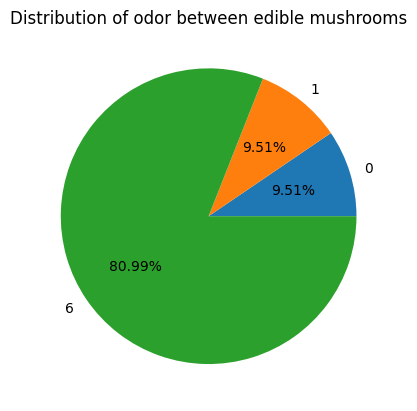

In [ ]:
plt.pie(x='perc', labels='odor', data=df_odor_e, autopct='%.2f%%')
plt.title('Distribution of odor between edible mushrooms')

Text(0.5, 1.0, 'Distribution of odor between poisonous mushrooms')

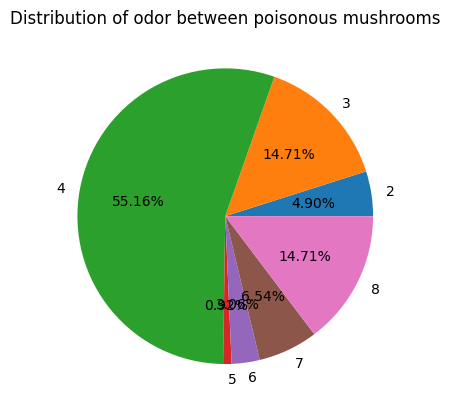

In [ ]:
plt.pie(x='perc', labels='odor', data=df_odor_p, autopct='%.2f%%')
plt.title('Distribution of odor between poisonous mushrooms')

# Gill attachment

In [ ]:
mush['gill-attachment'] = np.where(mush['gill-attachment'] == 'a', 0,
                            np.where(mush['gill-attachment'] == 'd', 1,
                                     np.where(mush['gill-attachment'] == 'f', 2,
                                            np.where(mush['gill-attachment'] == 'n', 3, 4)) ))
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,2,3,0,1,7,2,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,2,3,9,1,0,2,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,0,3,8,1,1,2,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,2,2,8,1,7,2,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,2,3,3,0,6,2,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,4,3,0,0,6,0,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,2,3,0,0,6,0,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,3,3,0,0,6,0,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,4,2,0,0,3,2,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [194]:
agg = mush.groupby(['class', 'gill-attachment'])['gill-attachment'].count()
agg

class  gill-attachment
e      a                   192
       f                  4016
p      a                    18
       f                  3898
Name: gill-attachment, dtype: int64

All mushrooms have only either attached(0) or free(2) type of gill attachment. There is mostly free(2) type in both edible and poisonous. So I do not think this is any relevant.

In [195]:
df_g_attachment = agg.to_frame()
df_g_attachment['count'] = df_g_attachment['gill-attachment']
df_g_attachment['class'] = df_g_attachment.index.get_level_values(0)
df_g_attachment['gill-attachment'] = df_g_attachment.index.get_level_values(1)
df_g_attachment = df_g_attachment.reset_index(drop=True)
df_g_attachment

,gill-attachment,count,class
0,a,192,e
1,f,4016,e
2,a,18,p
3,f,3898,p


In [198]:
df_g_attachment_p = df_g_attachment[df_g_attachment['class'] == 'p'].reset_index(drop=True)
df_g_attachment_e = df_g_attachment[df_g_attachment['class'] == 'e'].reset_index(drop=True)
df_g_attachment_p['perc'] = df_g_attachment_p['count'] / df_g_attachment_p['count'].sum()
df_g_attachment_e['perc'] = df_g_attachment_e['count'] / df_g_attachment_e['count'].sum()

Text(0.5, 1.0, 'Distribution of gill attachment between edible mushrooms')

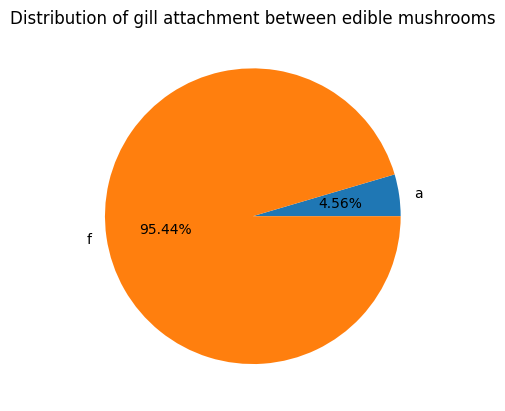

In [200]:
plt.pie(x='perc', labels='gill-attachment', data=df_g_attachment_e, autopct='%.2f%%')
plt.title('Distribution of gill attachment between edible mushrooms')

Text(0.5, 1.0, 'Distribution of gill attachment between poisonous mushrooms')

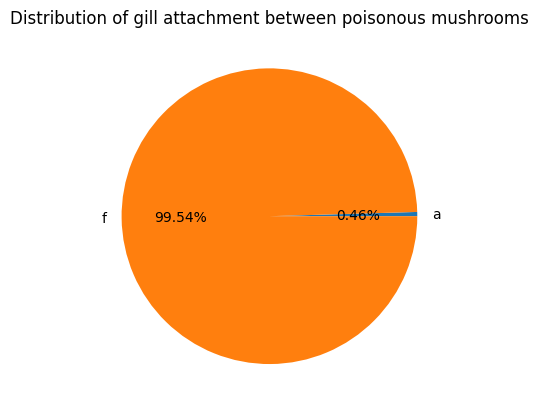

In [201]:
plt.pie(x='perc', labels='gill-attachment', data=df_g_attachment_p, autopct='%.2f%%')
plt.title('Distribution of gill attachment between poisonous mushrooms')

# Gill spacing

In [203]:
agg =mush.groupby(['class','gill-spacing'])['gill-spacing'].count()
agg

class  gill-spacing
e      c               3008
       w               1200
p      c               3804
       w                112
Name: gill-spacing, dtype: int64

Only small part of poisonous mushrooms has crowded(w) gill spacing, so a mushroom with this attribute will be more likely edible. Most mushrooms, both edible and poisonous, tend to have close(c) gill spacing, so it will not help us much with the class differentiating.

In [204]:
df_g_spacing = agg.to_frame()
df_g_spacing['count'] = df_g_spacing['gill-spacing']
df_g_spacing['class'] = df_g_spacing.index.get_level_values(0)
df_g_spacing['gill-spacing'] = df_g_spacing.index.get_level_values(1)
df_g_spacing = df_g_spacing.reset_index(drop=True)
df_g_spacing

,gill-spacing,count,class
0,c,3008,e
1,w,1200,e
2,c,3804,p
3,w,112,p


In [205]:
df_g_spacing_p = df_g_spacing[df_g_spacing['class'] == 'p'].reset_index(drop=True)
df_g_spacing_e = df_g_spacing[df_g_spacing['class'] == 'e'].reset_index(drop=True)
df_g_spacing_p['perc'] = df_g_spacing_p['count'] / df_g_spacing_p['count'].sum()
df_g_spacing_e['perc'] = df_g_spacing_e['count'] / df_g_spacing_e['count'].sum()

Text(0.5, 1.0, 'Distribution of gill spacing between poisonous mushrooms')

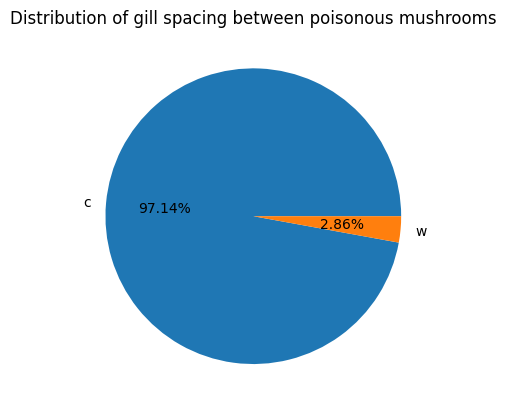

In [206]:
plt.pie(x='perc', labels='gill-spacing', data=df_g_spacing_p, autopct='%.2f%%')
plt.title('Distribution of gill spacing between poisonous mushrooms')

Text(0.5, 1.0, 'Distribution of gill spacing between edible mushrooms')

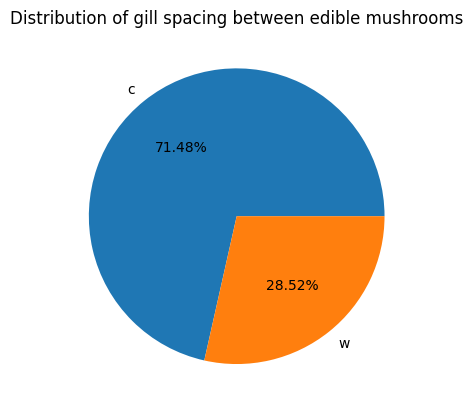

In [207]:
plt.pie(x='perc', labels='gill-spacing', data=df_g_spacing_e, autopct='%.2f%%')
plt.title('Distribution of gill spacing between edible mushrooms')

# Gill size

In [209]:
agg = mush.groupby(['class', 'gill-size'])['gill-size'].count()
agg

class  gill-size
e      b            3920
       n             288
p      b            1692
       n            2224
Name: gill-size, dtype: int64

In [211]:
df_g_size = agg.to_frame()
df_g_size['count'] = df_g_size['gill-size']
df_g_size['class'] = df_g_size.index.get_level_values(0)
df_g_size['gill-size'] = df_g_size.index.get_level_values(1)
df_g_size = df_g_size.reset_index(drop=True)
df_g_size

,gill-size,count,class
0,b,3920,e
1,n,288,e
2,b,1692,p
3,n,2224,p


In [212]:
df_g_size_p = df_g_size[df_g_spacing['class'] == 'p'].reset_index(drop=True)
df_g_size_e = df_g_size[df_g_spacing['class'] == 'e'].reset_index(drop=True)
df_g_size_p['perc'] = df_g_size_p['count'] / df_g_size_p['count'].sum()
df_g_size_e['perc'] = df_g_size_e['count'] / df_g_size_e['count'].sum()

In [ ]:
df_g_size_p = df_g_size[df_g_s['class'] == 'p'].reset_index(drop=True)
df_g_size_e = df_g_size[df_g_s['class'] == 'e'].reset_index(drop=True)
df_g_size_p['perc'] = df_g_spacing_p['count'] / df_g_spacing_p['count'].sum()
df_g_size_e['perc'] = df_g_spacing_e['count'] / df_g_spacing_e['count'].sum()

Text(0.5, 1.0, 'Distribution of gill size between edible mushrooms')

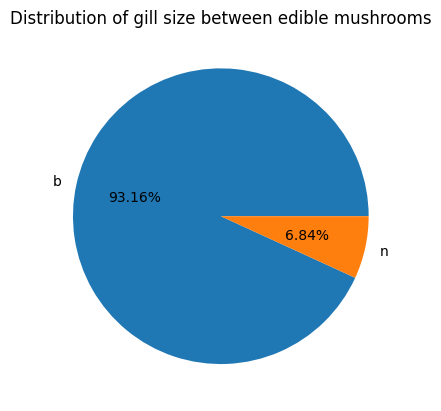

In [213]:
plt.pie(x='perc', labels='gill-size', data=df_g_size_e, autopct='%.2f%%')
plt.title('Distribution of gill size between edible mushrooms')

Text(0.5, 1.0, 'Distribution of gill size between poisonous mushrooms')

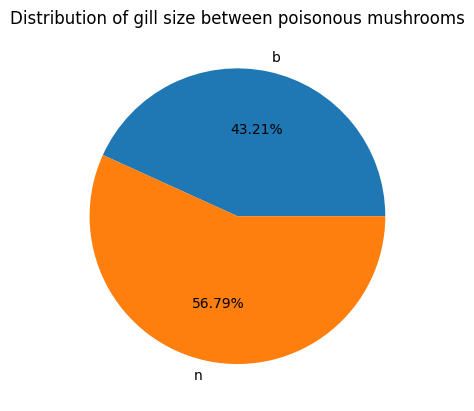

In [214]:
plt.pie(x='perc', labels='gill-size', data=df_g_size_p, autopct='%.2f%%')
plt.title('Distribution of gill size between poisonous mushrooms')

# Gill color

In [ ]:
agg = mush.groupby(['class', 'gill-color'])['gill-color'].count()
agg

class  gill-color
e      e               96
       g              248
       h              204
       k              344
       n              936
       o               64
       p              852
       u              444
       w              956
       y               64
p      b             1728
       g              504
       h              528
       k               64
       n              112
       p              640
       r               24
       u               48
       w              246
       y               22
Name: gill-color, dtype: int64

In [ ]:
mush['gill-color'] = np.where(mush['gill-color'] == 'k', 0,
                            np.where(mush['gill-color'] == 'n', 1,
                                     np.where(mush['gill-color'] == 'b', 2,
                                            np.where(mush['gill-color'] == 'h', 3,
                                                    np.where(mush['gill-color'] == 'g', 4,
                                                            np.where(mush['gill-color'] == 'r', 5,
                                                                    np.where(mush['gill-color'] == 'o', 6,
                                                                            np.where(mush['gill-color'] == 'p', 7,
                                                                                    np.where(mush['gill-color'] == 'u', 8,
                                                                                             np.where(mush['gill-color'] == 'e', 9,
                                                                                                      np.where(mush['gill-color'] == 'w', 10,
                                                                                                               np.where(mush['gill-color'] == 'y', 11, 12))) ))) )))) ))


In [ ]:
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,2,3,0,1,7,2,c,n,0,...,s,w,w,p,w,o,p,k,s,u
1,e,2,3,9,1,0,2,c,b,0,...,s,w,w,p,w,o,p,n,n,g
2,e,0,3,8,1,1,2,c,b,1,...,s,w,w,p,w,o,p,n,n,m
3,p,2,2,8,1,7,2,c,n,1,...,s,w,w,p,w,o,p,k,s,u
4,e,2,3,3,0,6,2,w,b,0,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,4,3,0,0,6,0,c,b,11,...,s,o,o,p,o,o,p,b,c,l
8120,e,2,3,0,0,6,0,c,b,11,...,s,o,o,p,n,o,p,b,v,l
8121,e,3,3,0,0,6,0,c,b,1,...,s,o,o,p,o,o,p,b,c,l
8122,p,4,2,0,0,3,2,c,n,2,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df_g_color = agg.to_frame()
df_g_color['count'] = df_g_color['gill-color']
df_g_color['class'] = df_g_color.index.get_level_values(0)
df_g_color['gill-color'] = df_g_color.index.get_level_values(1)
df_g_color = df_g_color.reset_index(drop=True)
df_g_color

,gill-color,count,class
0,e,96,e
1,g,248,e
2,h,204,e
3,k,344,e
4,n,936,e
5,o,64,e
6,p,852,e
7,u,444,e
8,w,956,e
9,y,64,e


In [ ]:
df_g_color_p = df_g_color[df_g_color['class'] == 'p'].reset_index(drop=True)
df_g_color_e = df_g_color[df_g_color['class'] == 'e'].reset_index(drop=True)
df_g_color_p['perc'] = df_g_color_p['count'] / df_g_color_p['count'].sum()
df_g_color_e['perc'] = df_g_color_e['count'] / df_g_color_e['count'].sum()

Text(0.5, 1.0, 'Distribution of gill color between edible mushrooms')

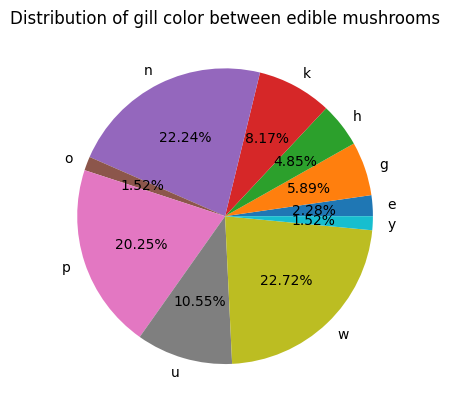

In [ ]:
plt.pie(x='perc', labels='gill-color', data=df_g_color_e, autopct='%.2f%%')
plt.title('Distribution of gill color between edible mushrooms')

Text(0.5, 1.0, 'Distribution of gill color between poisonous mushrooms')

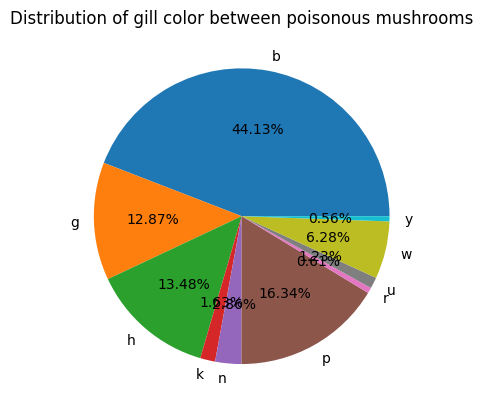

In [ ]:
plt.pie(x='perc', labels='gill-color', data=df_g_color_p, autopct='%.2f%%')
plt.title('Distribution of gill color between poisonous mushrooms')